In [57]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
iris = datasets.load_iris()

In [3]:
iris.data.shape

(150, 4)

In [4]:
iris_X = iris.data
iris_y = iris.target

In [5]:
np.unique(iris_y)

array([0, 1, 2])

## Supervised Learning

### k-Nearest Neighbors

The concept of k-Nearest Neighbors is intuitive. For a certain point, calculate the Euclidean distance from all rest points, and rank them from the nearest to the farthest. Then choose the nearest k neighbor points as sample. In these samples, each point belongs to a certain discrete group, and the group which appears most of the times in this sample will be considered as the category estimation for our chosen point.

In [6]:
from sklearn.neighbors import KNeighborsClassifier 
# from sklearn.neighbors import KNeighborsRegressor is for continuous y (target) value.

In [7]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors.classification:

class KNeighborsClassifier(sklearn.neighbors.base.NeighborsBase, sklearn.neighbors.base.KNeighborsMixin, sklearn.neighbors.base.SupervisedIntegerMixin, sklearn.base.ClassifierMixin)
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, optional (default = 5)
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : str or callable, optional (default = 'uniform')
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of a query point will have a
 |        greater influence than neighbors which are further away.
 |      - [ca

In [8]:
help(KNeighborsClassifier.fit)

Help on function fit in module sklearn.neighbors.base:

fit(self, X, y)
    Fit the model using X as training data and y as target values
    
    Parameters
    ----------
    X : {array-like, sparse matrix, BallTree, KDTree}
        Training data. If array or matrix, shape [n_samples, n_features],
        or [n_samples, n_samples] if metric='precomputed'.
    
    y : {array-like, sparse matrix}
        Target values of shape = [n_samples] or [n_samples, n_outputs]



In [9]:
# In order to randomly split training and testing data, construct indices

np.random.seed(0)
indices = np.random.permutation(iris_X.shape[0])

# leave 10 data points aside for testing
iris_X_train = iris_X[indices[:-20]]
iris_y_train = iris_y[indices[:-20]]
iris_X_test = iris_X[indices[-20:]]
iris_y_test = iris_y[indices[-20:]]

knn = KNeighborsClassifier()
knn.fit(iris_X_train,iris_y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

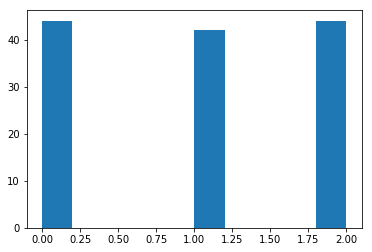

In [52]:
plt.hist(iris_y_train);

In [36]:
pred_knn = knn.predict(iris_X_test)

In [37]:
pred_knn

array([2, 2, 2, 1, 0, 1, 2, 2, 0, 1, 1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [11]:
iris_y_test

array([2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [39]:
sum(pred_knn==iris_y_test)/len(pred_knn)

0.9

### Logistic Classification

$$ y = sigmoid(X\beta - offset) + \epsilon = \frac{1}{1+\exp(-X\beta+offset)}+\epsilon$$

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model.logistic:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.linear_model.base.SparseCoefMixin)
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the cross-
 |  entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag' and 'lbfgs' solvers. It can handle
 |  both dense and sparse input. Use C-ordered arrays or CSR matrices
 |  containing 64-bit floats for optimal performance; any other input format
 |  will be converted (and copied).
 |  
 |  The 'newton-cg', 'sag', and 'lbfgs' solve

In [14]:
log = LogisticRegression(solver='lbfgs',C=1e5,multi_class='multinomial')

In [15]:
log.fit(iris_X_train,iris_y_train)

C:\Users\yli368\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

In [41]:
pred_log = log.predict(iris_X_test)

In [42]:
pred_log

array([2, 2, 1, 2, 0, 1, 2, 2, 0, 1, 1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [17]:
iris_y_test

array([2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [43]:
sum(pred_log==iris_y_test)/len(pred_log)

0.9

Here fit_intercept is default to be true, but should pay attention if X already has constant column in it, remember to set to False.

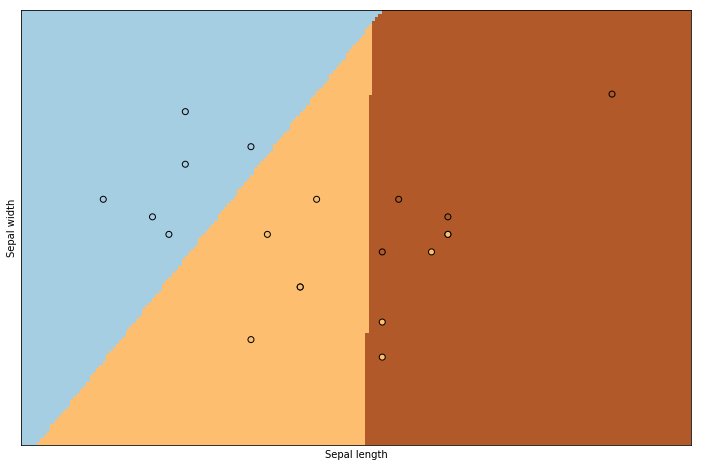

In [18]:

logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
logreg.fit(iris_X_train[:,:2],iris_y_train)
x_min, x_max = iris_X_test[:, 0].min() - .5, iris_X_test[:, 0].max() + .5
y_min, y_max = iris_X_test[:, 1].min() - .5, iris_X_test[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(12, 8))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(iris_X_test[:, 0], iris_X_test[:, 1], c=iris_y_test, edgecolors='k', cmap=plt.cm.Paired);
plt.xlabel('Sepal length');
plt.ylabel('Sepal width');

plt.xlim(xx.min(), xx.max());
plt.ylim(yy.min(), yy.max());
plt.xticks(());
plt.yticks(());



In [44]:
pred_log2 = logreg.predict(iris_X_test[:,:2])

In [45]:
pred_log2

array([2, 2, 2, 2, 0, 1, 2, 1, 0, 2, 1, 1, 2, 0, 0, 0, 2, 1, 2, 0])

In [20]:
iris_y_test

array([2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [46]:
sum(pred_log2==iris_y_test)/len(pred_log2)

0.75

Regularization is important for avoid overfitting. For example, in polynomial regression,

$$\theta = y \cdot X(X^T X + \alpha I)^{-1}$$

Choose the appropriate $\alpha$ to change the order of regularization.

More generally, we have $L_p$ regularizer: $(\Sigma_{i} |(\theta_i)|^p)^{\frac{1}{p}}$

For p=1, which is known as Lasso, the parameters finally chosen will be as sparse as possible (a good news for high-dimension problems).

![title](Regularization.PNG)

In [21]:
help(xx.ravel)

Help on built-in function ravel:

ravel(...) method of numpy.ndarray instance
    a.ravel([order])
    
    Return a flattened array.
    
    Refer to `numpy.ravel` for full documentation.
    
    See Also
    --------
    numpy.ravel : equivalent function
    
    ndarray.flat : a flat iterator on the array.



In [22]:
help(np.c_)

Help on CClass in module numpy.lib.index_tricks object:

class CClass(AxisConcatenator)
 |  Translates slice objects to concatenation along the second axis.
 |  
 |  This is short-hand for ``np.r_['-1,2,0', index expression]``, which is
 |  useful because of its common occurrence. In particular, arrays will be
 |  stacked along their last axis after being upgraded to at least 2-D with
 |  1's post-pended to the shape (column vectors made out of 1-D arrays).
 |  
 |  See Also
 |  --------
 |  column_stack : Stack 1-D arrays as columns into a 2-D array.
 |  r_ : For more detailed documentation.
 |  
 |  Examples
 |  --------
 |  >>> np.c_[np.array([1,2,3]), np.array([4,5,6])]
 |  array([[1, 4],
 |         [2, 5],
 |         [3, 6]])
 |  >>> np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
 |  array([[1, 2, 3, 0, 0, 4, 5, 6]])
 |  
 |  Method resolution order:
 |      CClass
 |      AxisConcatenator
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |    

### Classification Tree and Random Forest

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [24]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree.tree:

class DecisionTreeClassifier(BaseDecisionTree, sklearn.base.ClassifierMixin)
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : string, optional (default="gini")
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : string, optional (default="best")
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_depth : int or None, optional (default=None)
 |      The maximum depth of the tree. If None, then nodes are expanded until
 |      all leaves are pure or until all leaves contain less than
 |      min_samples_split samples.
 |  
 |  min_samples_split : int, float, optional (default=2)

In [25]:
clf = DecisionTreeClassifier()
clf = clf.fit(iris_X_train, iris_y_train)

In [47]:
pred_cart = clf.predict(iris_X_test)

In [48]:
pred_cart

array([2, 2, 1, 2, 0, 1, 2, 2, 0, 1, 1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [27]:
iris_y_test

array([2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [50]:
sum(pred_cart==iris_y_test)/len(pred_cart)

0.9

In [29]:
# tree.plot_tree(clf.fit(iris_X_train, iris_y_train))

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble.forest:

class RandomForestClassifier(ForestClassifier)
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is always the same as the original
 |  input sample size but the samples are drawn with replacement if
 |  `bootstrap=True` (default).
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimators : integer, optional (default=10)
 |      The number of trees in the forest.
 |  
 |      .. versionchanged:: 0.20
 |         The default value of ``n_estimators`` will change from 10 in
 |         version 0.20 to 100 in version 0.22.
 |  
 |  criterion : string, optional (default="gini")
 |      The function to measure the quality of a split. Supported criteria 

In [32]:
clf = RandomForestClassifier(n_estimators=100,min_samples_leaf=2)

In [33]:
clf.fit(iris_X_train,iris_y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [54]:
pred_random_forest = clf.predict(iris_X_test)

In [55]:
pred_random_forest

array([2, 2, 1, 2, 0, 1, 2, 2, 0, 1, 1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [35]:
iris_y_test

array([2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [56]:
sum(pred_random_forest==iris_y_test)/len(pred_random_forest)

0.9

## Other Example

In [91]:
df = pd.read_excel('ALFI.xlsx')

In [92]:
df['range'] = (df['high']-df['low'])/df['low']

In [93]:
df = df.loc[df['range']!=0,:]
df.dropna(axis=0,inplace=True)

In [94]:
df

,update_date,open,high,low,close,volume,range
1612,2014-08-20,14146.40,14180.44,14139.74,14172.79,119232,0.002878
1613,2014-08-21,14213.37,14351.86,14213.37,14350.99,234094,0.009744
1614,2014-08-22,14340.92,14386.34,14257.65,14339.73,185940,0.009026
1615,2014-08-25,14332.45,14332.45,14269.30,14301.69,103820,0.004426
1616,2014-08-26,14320.08,14380.25,14301.68,14380.25,116740,0.005494
1617,2014-08-27,14445.07,14489.08,14407.14,14444.58,170970,0.005687
1619,2014-08-29,14413.57,14528.12,14384.17,14496.70,248382,0.010008
1620,2014-09-01,14547.88,14644.70,14462.87,14593.31,267534,0.012572
1621,2014-09-02,14576.41,14909.18,14541.85,14869.40,456664,0.025260
1622,2014-09-03,14838.06,14984.13,14814.75,14853.74,439036,0.011433


In [113]:
X = np.array(df['volume'])
y = np.array(df['range'])

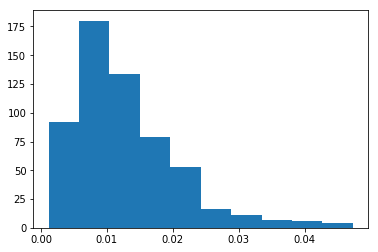

In [114]:
plt.hist(y);

In [115]:
y = np.array(list(map(lambda x: 1 if x>=0.012 else -1,y)))

In [116]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [138]:
sum(y==-1)/y.shape[0]

array([0.57560137])

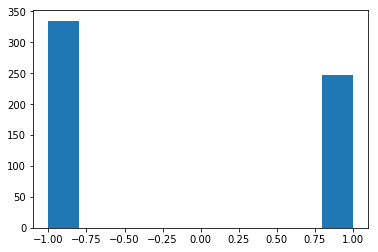

In [130]:
plt.hist(y);

In [118]:
indices = np.random.permutation(X.shape[0])

In [119]:
X_train = X[indices[:-100]]
y_train = y[indices[:-100]]
X_test = X[indices[-100:]]
y_test = y[indices[-100:]]

In [121]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [122]:
X_test.shape

(100, 1)

In [128]:
pred_cart = clf.predict(X_test).reshape(-1,1)

In [129]:
sum(pred_cart==y_test)/pred_cart.shape[0]

array([0.73])

In [127]:
pred_cart

array([ 1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1,
       -1,  1, -1, -1,  1,  1,  1, -1, -1, -1, -1, -1,  1, -1,  1,  1, -1,
       -1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1, -1,
       -1, -1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,
        1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1, -1,
       -1, -1,  1, -1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1, -1])